In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LogLocator, LogFormatter, FuncFormatter


In [5]:
# Set up files
filepath = '/Users/helenhu/Documents/Variance_data/JoV23Data.csv'
jov_data = pd.read_csv(filepath)
print(jov_data.head())

  Observer FlankinDirection  Eccen_X  Eccen_Y  RadialEccentricity  \
0       S1           radial        5        0                   5   
1       S1           radial       -5        0                   5   
2       S1           radial        0        5                   5   
3       S1           radial        0       -5                   5   
4       S1           radial       10        0                  10   

   CrowdingDistance  TargetDeg   Font Meridian      Task  Session  
0          0.591501   0.422501  Sloan    Right  crowding        1  
1          0.895702   0.639787  Sloan     Left  crowding        1  
2          2.281506   1.629647  Sloan    Upper  crowding        1  
3          2.382906   1.702076  Sloan    Lower  crowding        1  
4          1.859005   1.327860  Sloan    Right  crowding        1  


In [6]:
print('Number of subjects: ', jov_data['Observer'].nunique())
print('Flanker directions: ', jov_data['FlankinDirection'].unique())
print('Eccentricity X: ', jov_data['Eccen_X'].unique())
print('Eccentricity Y: ', jov_data['Eccen_Y'].unique())
print('Radial Eccentricity: ', jov_data['RadialEccentricity'].unique())
print('Meridian: ', jov_data['Meridian'].unique())
print('Task: ', jov_data['Task'].unique())
print('Session: ', jov_data['Session'].unique())

Number of subjects:  50
Flanker directions:  ['radial' 'tangential' 'horizontal']
Eccentricity X:  [  5  -5   0  10 -10]
Eccentricity Y:  [  0   5  -5  10 -10]
Radial Eccentricity:  [ 5 10  0]
Meridian:  ['Right' 'Left' 'Upper' 'Lower' 'fovea']
Task:  ['crowding' 'acuity']
Session:  [1 2]


In [7]:
# clean up: filtering for sessions with radial, peripheral, crowding

jov_data_filtered = jov_data[jov_data['FlankinDirection'] == 'radial']
jov_data_filtered = jov_data_filtered[jov_data_filtered['Meridian'] != 'fovea']

jov_data_filtered = jov_data_filtered[jov_data_filtered['Meridian'] != 'Upper']
jov_data_filtered = jov_data_filtered[jov_data_filtered['Meridian'] != 'Lower']


jov_data_filtered = jov_data_filtered[jov_data_filtered['Task'] == 'crowding']
jov_data_filtered = jov_data_filtered[jov_data_filtered['Font'] == 'Sloan']

print(jov_data_filtered.head())

   Observer FlankinDirection  Eccen_X  Eccen_Y  RadialEccentricity  \
0        S1           radial        5        0                   5   
1        S1           radial       -5        0                   5   
4        S1           radial       10        0                  10   
5        S1           radial      -10        0                  10   
16       S1           radial       10        0                  10   

    CrowdingDistance  TargetDeg   Font Meridian      Task  Session  
0           0.591501   0.422501  Sloan    Right  crowding        1  
1           0.895702   0.639787  Sloan     Left  crowding        1  
4           1.859005   1.327860  Sloan    Right  crowding        1  
5           2.720907   1.943505  Sloan     Left  crowding        1  
16          1.859005   1.327860  Sloan    Right  crowding        2  


In [8]:
print('Number of subjects: ', jov_data_filtered['Observer'].nunique())
print('Flanker directions: ', jov_data_filtered['FlankinDirection'].unique())
print('Eccentricity X: ', jov_data_filtered['Eccen_X'].unique())
print('Eccentricity Y: ', jov_data_filtered['Eccen_Y'].unique())
print('Radial Eccentricity: ', jov_data_filtered['RadialEccentricity'].unique())
print('Meridian: ', jov_data_filtered['Meridian'].unique())
print('Task: ', jov_data_filtered['Task'].unique())
print('Session: ', jov_data_filtered['Session'].unique())

Number of subjects:  50
Flanker directions:  ['radial']
Eccentricity X:  [  5  -5  10 -10]
Eccentricity Y:  [0]
Radial Eccentricity:  [ 5 10]
Meridian:  ['Right' 'Left']
Task:  ['crowding']
Session:  [1 2]


In [9]:
# TargetDeg is the size of the target. spacing = 1.4X size
print(jov_data_filtered['CrowdingDistance']/jov_data_filtered['TargetDeg'])

0       1.4
1       1.4
4       1.4
5       1.4
16      1.4
       ... 
1383    1.4
1390    1.4
1391    1.4
1394    1.4
1395    1.4
Length: 400, dtype: float64


In [10]:
# acquire bouma factors: crowding distance ./ eccentricity
bouma = jov_data_filtered['CrowdingDistance']/jov_data_filtered['RadialEccentricity']
print(bouma)

0       0.118300
1       0.179140
4       0.185900
5       0.272091
16      0.185900
          ...   
1383    0.152100
1390    0.126750
1391    0.380251
1394    0.185900
1395    0.280541
Length: 400, dtype: float64


In [11]:
print(f'Minimum Bouma: {min(bouma)}')
print(f'Maximum Bouma: {max(bouma)}')
print(f'Mean Bouma: {np.mean(bouma)}')
print(f'Median Bouma: {np.median(bouma)}')
print(f'Std Bouma: {np.std(bouma)}')

Minimum Bouma: 0.08450021183055981
Maximum Bouma: 0.723321813269592
Mean Bouma: 0.2345894880840001
Median Bouma: 0.21632054228623301
Std Bouma: 0.09689568069057243


In [12]:
lowerBound = np.mean(bouma) - np.std(bouma)
upperBound = np.mean(bouma) + np.std(bouma)

print('Lower bound:', lowerBound)
print('Upper bound:', upperBound)

Lower bound: 0.13769380739342768
Upper bound: 0.3314851687745725


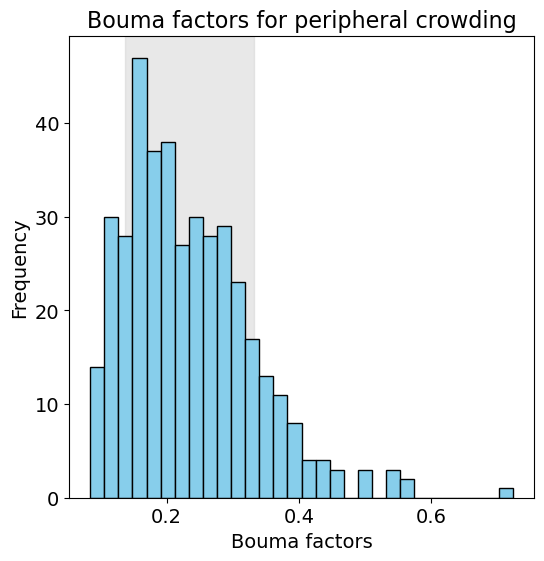

In [18]:
# Plot all bouma factors
plt.figure(figsize=(6, 6))  # Square figure

plt.axvspan(lowerBound, upperBound, color='lightgray', alpha=0.5) # mean +- one std

plt.hist(bouma, bins=30, color='skyblue', edgecolor='black')
plt.title("Bouma factors for peripheral crowding", fontsize = 16)
plt.xlabel("Bouma factors", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.gca().tick_params(labelsize=14)
# plt.xscale('log')
plt.show()

In [14]:
jov_data_5deg = jov_data_filtered[jov_data_filtered['RadialEccentricity'] == 5]
bouma_5deg = jov_data_5deg['CrowdingDistance']/jov_data_5deg['RadialEccentricity']
print(f'5 deg, Minimum Bouma:{min(bouma_5deg)}')
print(f'5 deg, Maximum Bouma:{max(bouma_5deg)}')
print(f'5 deg, Mean Bouma:{np.mean(bouma_5deg)}')


jov_data_10deg = jov_data_filtered[jov_data_filtered['RadialEccentricity'] == 10]
bouma_10deg = jov_data_10deg['CrowdingDistance']/jov_data_10deg['RadialEccentricity']
print(f'10 deg, Minimum Bouma:{min(bouma_10deg)}')
print(f'10 deg, Maximum Bouma:{max(bouma_10deg)}')
print(f'10 deg, Mean Bouma:{np.mean(bouma_10deg)}')


5 deg, Minimum Bouma:0.08450021183055981
5 deg, Maximum Bouma:0.723321813269592
5 deg, Mean Bouma:0.20383141097767626
10 deg, Minimum Bouma:0.09633024148683819
10 deg, Maximum Bouma:0.572911436211195
10 deg, Mean Bouma:0.2653475651903239


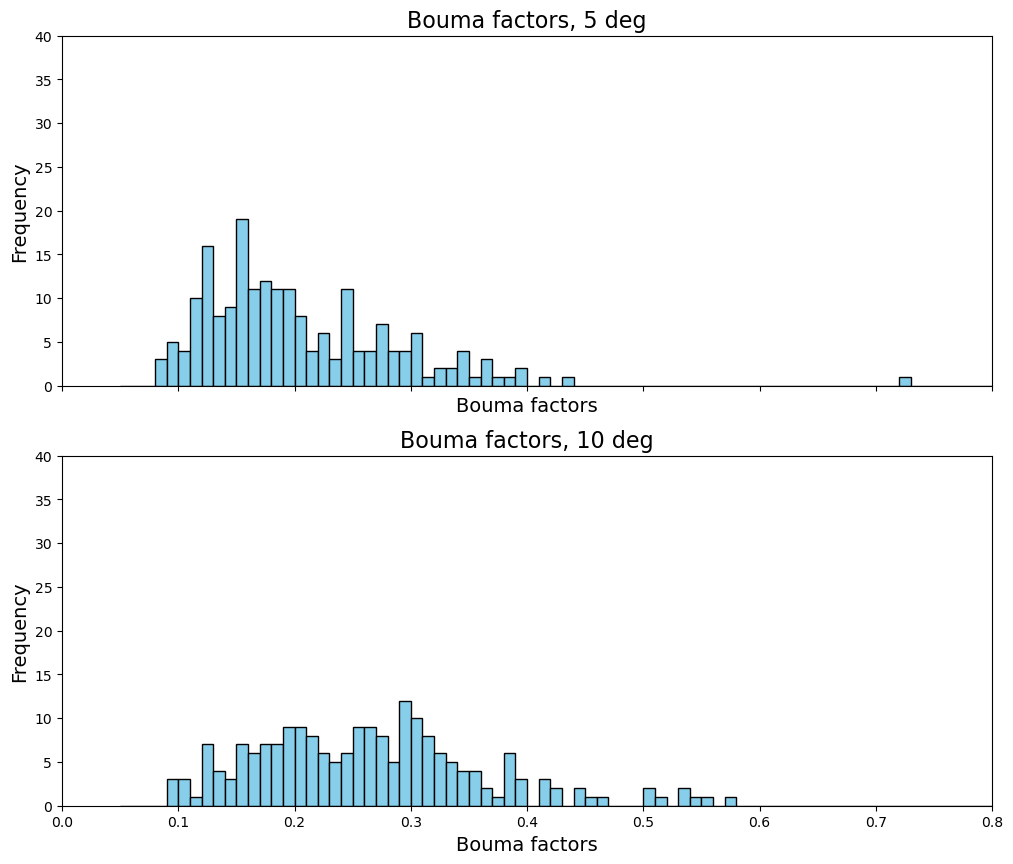

In [15]:
bin_width = 0.01
min_bin = 0.05
max_bin = 1
def_bins = np.arange(min_bin, max_bin + bin_width, bin_width)  # Shared bins


# Plot all bouma factors
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True, sharey=True)

axes[0].hist(bouma_5deg, bins=def_bins, color='skyblue', edgecolor='black')
axes[0].set_title("Bouma factors, 5 deg", fontsize = 16)
axes[0].set_xlim([0,0.8])
axes[0].set_ylim([0,40])

axes[1].hist(bouma_10deg, bins=def_bins, color='skyblue', edgecolor='black')
axes[1].set_title("Bouma factors, 10 deg", fontsize = 16)


for ax in axes.flat:
    ax.set_xlabel("Bouma factors", fontsize=14)
    ax.set_ylabel("Frequency", fontsize=14)

plt.show()

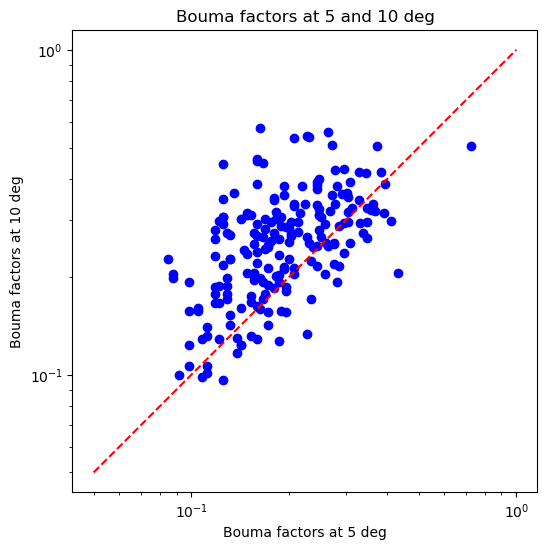

In [16]:
plt.figure(figsize=(6, 6))  # Make the plot square
plt.scatter(bouma_5deg, bouma_10deg, color='blue', label='Data points')
plt.plot([0.05, 1], [0.05, 1], 
         color='red', linestyle='--', label='y = x')  # Line y = x

# Set axes to have equal scale
plt.axis('equal')
plt.xscale('log')
plt.yscale('log')
# Add labels and legend
plt.xlabel('Bouma factors at 5 deg')
plt.ylabel('Bouma factors at 10 deg')
plt.title('Bouma factors at 5 and 10 deg')

plt.gca().xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
plt.gca().yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))


# Show the plot
plt.show()